# Лабораторная работа №4
## Антипов Арсений Павлович ИВТ 1.2 2 курс

1.1 Написать функцию two_sum, которая возвращает кортеж из двух индексов элементов списка lst, таких что сумма элементов по этим индексам равна переменной target, Элемент по индексу может быть выбран лишь единожды, значения в списке могут повторяться. Если в списке встречается больше чем два индекса, подходящих под условие - вернуть наименьшие из всех. Элементы находятся в списке в произвольном порядке. Алгоритм на двух циклах, сложность O(n2). Пример кода-заготовки на replit

In [8]:
def two_sum(lst, target):
  for i in range(len(lst)):
      for j in range(i+1, len(lst)):
          if lst[i] + lst[j] == target:
              return (i, j)
  return None

lst = [1, 2, 3, 4, 5, 6, 7, 8, 9]
target = 8
result1 = two_sum(lst, target)
print(result1)

(0, 6)


1.2 : Усовершенствуйте предыдущую задачу ??, добавив функцию two_sum_hashed(lst, target) так, чтобы сложность алгоритма была ниже: O(n) или O(n · log(n)).

In [9]:
def two_sum_hashed(lst, target):
  value_dict = {}
  for i, num in enumerate(lst):
      complement = target - num
      if complement in value_dict:
          return (value_dict[complement], i)
      value_dict[num] = i
  return None

lst = [1, 2, 3, 4, 5, 6, 7, 8, 9]
target = 8
result2 = two_sum_hashed(lst, target)
print(result2)

(2, 4)


1.3 Усовершенствуйте предыдущую задачу 1.2, добавив функцию , которая возвращает все наборы индексов, удовлетворяющих условию суммы target.

In [10]:
def two_sum_hashed_all(lst, target):
  index_dict = {}
  result = []
  for i, num in enumerate(lst):
      complement = target - num
      if complement in index_dict:
          for j in index_dict[complement]:
              result.append((j, i))
      if num not in index_dict:
          index_dict[num] = []
      index_dict[num].append(i)
  return result

lst = [1, 2, 3, 4, 5, 6, 7, 8, 9]
target = 8
result3 = two_sum_hashed_all(lst, target)
print(result3)

[(2, 4), (1, 5), (0, 6)]


1.4 Повторите или изучите понятие мемоизации в Python. Реализуйте с помощью мемоизации и рекурсии вычисление чисел Фибоначчи сначала рукаки с помощью вручную добавленого к рекурсивной функции словаря с ранее вычисленными числами Фибоначчи, а затем с помощью декоратора @cache из стандартного модуля Python functools.

In [11]:
def func(n, memo={}):
  if n in memo:
      return memo[n]
  if n <= 1:
      res = n
  else:
      res = func(n-1, memo) + func(n-2, memo)
  memo[n] = res
  return res

n = 10
result = func(n)
print(result)

from functools import cache

@cache
def func2(n):
  if n <= 1:
      return n
  return func2(n-1) + func2(n-2)

n2 = 10
result2 = func2(n)
print(result2)

55
55


2.1 Отправка почты через smtplib.

In [12]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

def send_email(sender_email, sender_password, receiver_email, subject, message):
    server = smtplib.SMTP('smtp.mail.ru', 587)
    server.starttls()
    server.login(sender_email, sender_password)

    msg = MIMEMultipart()
    msg['From'] = sender_email
    msg['To'] = receiver_email
    msg['Subject'] = subject

    msg.attach(MIMEText(message, 'plain'))
    server.send_message(msg)
    server.quit()

sender_email = 'antipovsenya@mail.ru'
sender_password = 'Hqn1TRZ1n0geUiEVisgh'
receiver_email = 'ukhanov.o@bk.ru'
subject = 'Привет, я прислал тебе письмо!'
message = 'Тестовое письмо!'

send_email(sender_email, sender_password, receiver_email, subject, message)

2.2 Парсинг сайта погоды (wheather HTML parsing) на google.com и/или на простом сайте wttr с помощью BeautifulSoup (v4).

In [13]:
import requests
from bs4 import BeautifulSoup

headers = {'UserAgent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64, rv:91,0) Gecko/20100101 Firefox/91.0'}
response = requests.get('https://wttr.in/StPetersburg', headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

print(soup.text)

Weather report: StPetersburg

   _`/"".-.     Light snow
    ,\_(   ).   -2(-6) °C      
     /(___(__)  ← 19 km/h      
       *  *  *  5 km           
      *  *  *   0.2 mm         
                                                       ┌─────────────┐                                                       
┌──────────────────────────────┬───────────────────────┤  Mon 25 Dec ├───────────────────────┬──────────────────────────────┐
│            Morning           │             Noon      └──────┬──────┘     Evening           │             Night            │
├──────────────────────────────┼──────────────────────────────┼──────────────────────────────┼──────────────────────────────┤
│               Freezing fog   │  _`/"".-.     Light snow     │      .-.      Moderate snow  │      .-.      Moderate snow  │
│  _ - _ - _ -  -8(-13) °C     │   ,\_(   ).   -5(-10) °C     │     (   ).    -4(-9) °C      │     (   ).    -5(-10) °C     │
│   _ - _ - _   ↖ 12-22 km/h   │    /(___(__)  ↖ 15-22 km/h

2.3 С помощью бибилиотеки matplotlib вывести два окна с графиками функций по личному выбору. В одном окне два графика двух разных функций. В другом окне - один график ещё одной функции.

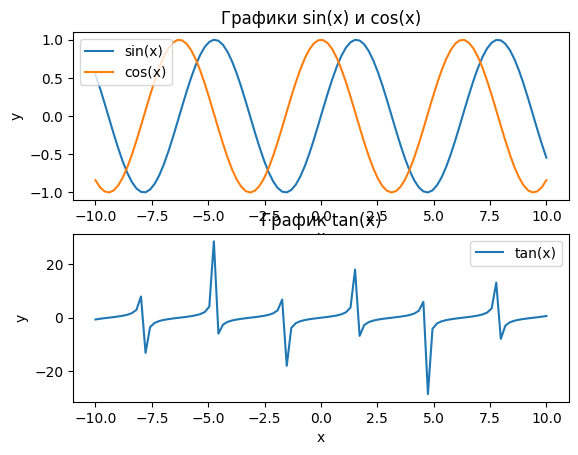

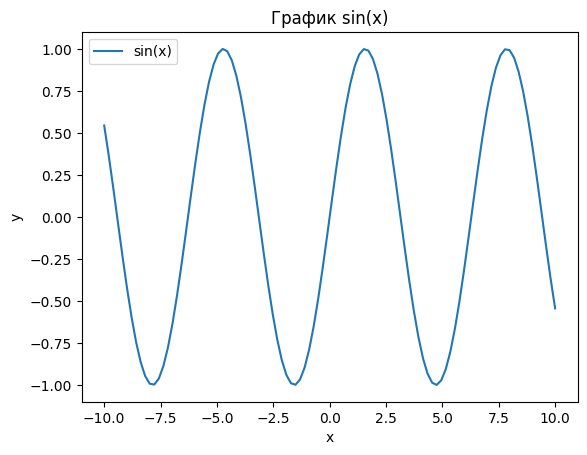

In [14]:
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(-10, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

plt.figure(1)

plt.subplot(2, 1, 1)
plt.plot(x, y1, label='sin(x)')
plt.plot(x, y2, label='cos(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графики sin(x) и cos(x)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(x, y3, label='tan(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('График tan(x)')
plt.legend()

plt.figure(2)
plt.plot(x, y1, label='sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('График sin(x)')
plt.legend()

plt.show()